# Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

# loading the data from a folder to the code in a binary mode

In [ ]:
import cv2
import os 
import matplotlib.pyplot as plt

344520


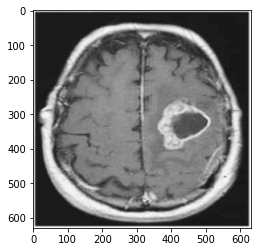

In [ ]:
for parent,_,content in os.walk("/content/drive/MyDrive/Data For ML/Brain_Tumor/brain_tumor_dataset/yes"):
  for i in content : 
    p = os.path.join(parent,i)
    img = cv2.imread(p)
    print(img.size)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_normalized = gray /255
    img_resized = cv2.resize(img,(630,630))
    plt.imshow(img_resized,cmap='gray')
    break

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/Data For ML/Brain_Tumor/brain_tumor_dataset"
training_datagen = ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2

)

In [ ]:
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                            shuffle=True,
                                                            batch_size=25,
                                                       target_size=(150, 150)

)

Found 253 images belonging to 2 classes.


In [ ]:
VALIDATION_DIR = "/content/drive/MyDrive/Data For ML/Brain_Tumor/brain_validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                            shuffle=True,
                                                            batch_size=25,
                                                       target_size=(150, 150)

)


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                            shuffle=True,
                                                            batch_size=25,
                                                            target_size=(150, 150)
)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


# Implementing a simple neural network

In [ ]:
from sklearn.utils import class_weight 
from keras.layers import Input , Conv2D , BatchNormalization , MaxPooling2D , Dropout , Flatten , Dense , GlobalAveragePooling2D
from keras.models import Sequential

In [ ]:
model0 = tf.keras.models.Sequential([
                                    
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Flatten(input_shape=(150,150,3)),
    tf.keras.layers.Dense(64, activation= 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu' ),
    tf.keras.layers.Dense(16, activation= 'relu'),
    tf.keras.layers.Dense(16, activation='relu'),  
    tf.keras.layers.Dense(2, activation='softmax')
])


In [ ]:
model0.summary()

model0.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.00008),
                loss = "categorical_crossentropy",
                metrics=["accuracy"])

history0 = model0.fit(train_generator,epochs = 20, validation_data = validation_generator )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 64)                4320064   
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 2)                 34        
                                                                 
Total params: 4,321,682
Trainable params: 4,321,682
Non-

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
11/11 [==============================] - 91s 9s/step - loss: 0.6626 - accuracy: 0.5810 - val_loss: 0.6435 - val_accuracy: 0.6126
Epoch 2/20
11/11 [==============================] - 3s 271ms/step - loss: 0.6375 - accuracy: 0.6126 - val_loss: 0.6136 - val_accuracy: 0.6126
Epoch 3/20
11/11 [==============================] - 3s 264ms/step - loss: 0.6447 - accuracy: 0.6126 - val_loss: 0.6121 - val_accuracy: 0.6126
Epoch 4/20
11/11 [==============================] - 3s 273ms/step - loss: 0.6294 - accuracy: 0.6126 - val_loss: 0.6242 - val_accuracy: 0.6126
Epoch 5/20
11/11 [==============================] - 3s 274ms/step - loss: 0.6347 - accuracy: 0.6126 - val_loss: 0.6091 - val_accuracy: 0.6126
Epoch 6/20
11/11 [==============================] - 3s 275ms/step - loss: 0.6259 - accuracy: 0.6126 - val_loss: 0.6152 - val_accuracy: 0.6126
Epoch 7/20
11/11 [==============================] - 3s 282ms/step - loss: 0.6335 - accuracy: 0.6087 - val_loss: 0.6030 - val_accuracy: 0.6126
Epoch 8/

In [ ]:
model0.evaluate(validation_generator)

11/11 [==============================] - 1s 88ms/step - loss: 0.5738 - accuracy: 0.7036


[0.573788583278656, 0.7035573124885559]

# Vizualizing the results

Accuracy

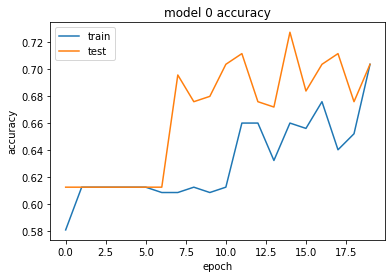

In [ ]:
plt.plot(history0.history['accuracy'])
plt.plot(history0.history['val_accuracy'])
plt.title('model 0 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Loss

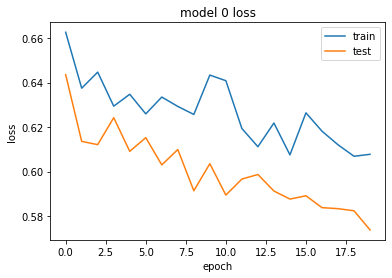

In [ ]:
plt.plot(history0.history['loss'])
plt.plot(history0.history['val_loss'])
plt.title('model 0 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Implementing a CNN

In [ ]:
from sklearn.utils import class_weight 
from keras.layers import Input , Conv2D , BatchNormalization , MaxPooling2D , Dropout , Flatten , Dense , GlobalAveragePooling2D
from keras.models import Sequential

In [ ]:
model1 = Sequential([ 
      Conv2D(filters = 64 , kernel_size = (3,3), activation="relu", input_shape=(150,150,3)),
      MaxPooling2D(pool_size = (3,3)),
      Conv2D(filters = 32 , kernel_size = (3,3), activation="relu"),
      MaxPooling2D(pool_size = (3,3)),
      Conv2D(filters = 32 , kernel_size = (3,3), activation="relu"),
      MaxPooling2D(pool_size = (3,3)),
      Flatten(),
      Dense(units = 512 , activation="relu"),
      Dropout(rate = 0.5),
      Dense(units = 2 , activation="softmax")
  ])

In [ ]:
model1.summary()

model1.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.00008),
                loss = "categorical_crossentropy",
                metrics=["accuracy"])

history1 = model1.fit(train_generator,epochs = 20, validation_data = validation_generator )


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)        

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
11/11 [==============================] - 8s 673ms/step - loss: 0.6762 - accuracy: 0.5692 - val_loss: 0.6680 - val_accuracy: 0.6126
Epoch 2/20
11/11 [==============================] - 7s 658ms/step - loss: 0.6552 - accuracy: 0.6206 - val_loss: 0.6655 - val_accuracy: 0.6126
Epoch 3/20
11/11 [==============================] - 7s 656ms/step - loss: 0.6444 - accuracy: 0.6126 - val_loss: 0.6567 - val_accuracy: 0.6126
Epoch 4/20
11/11 [==============================] - 7s 648ms/step - loss: 0.6348 - accuracy: 0.6087 - val_loss: 0.6525 - val_accuracy: 0.6126
Epoch 5/20
11/11 [==============================] - 7s 650ms/step - loss: 0.6474 - accuracy: 0.6166 - val_loss: 0.6394 - val_accuracy: 0.6126
Epoch 6/20
11/11 [==============================] - 7s 657ms/step - loss: 0.6355 - accuracy: 0.6166 - val_loss: 0.6297 - val_accuracy: 0.6206
Epoch 7/20
11/11 [==============================] - 7s 656ms/step - loss: 0.6307 - accuracy: 0.6126 - val_loss: 0.6221 - val_accuracy: 0.6206
Epoch 

In [ ]:
model1.evaluate(validation_generator)

11/11 [==============================] - 2s 158ms/step - loss: 0.4937 - accuracy: 0.7628


[0.49366796016693115, 0.7628458738327026]

# Vizualizing results 

Accuracy

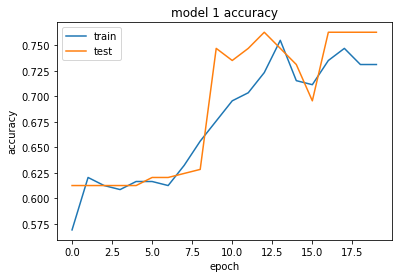

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Loss

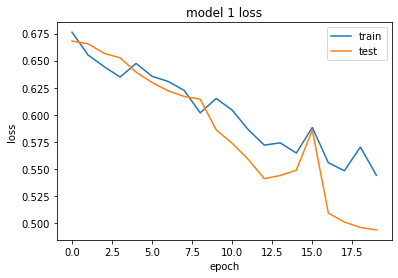

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Transfer Learning [MobileNet]

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
base_model = MobileNetV2(input_shape=(150,150,3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model2 = tf.keras.Sequential([
                              base_model,
                              GlobalAveragePooling2D(),
                              Dense(1024, activation = 'relu'),
                              Dropout(rate = 0.2),
                              Dense(2, activation='softmax')
                            ])

model2.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.00008),
                loss = "categorical_crossentropy",
                metrics=["accuracy"])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
history2 = model2.fit(train_generator,epochs = 20, validation_data = validation_generator)

Epoch 1/20
11/11 [==============================] - 9s 634ms/step - loss: 0.7695 - accuracy: 0.6166 - val_loss: 0.6332 - val_accuracy: 0.6640
Epoch 2/20
11/11 [==============================] - 6s 565ms/step - loss: 0.5620 - accuracy: 0.7036 - val_loss: 0.4739 - val_accuracy: 0.7589
Epoch 3/20
11/11 [==============================] - 6s 557ms/step - loss: 0.4959 - accuracy: 0.7628 - val_loss: 0.4047 - val_accuracy: 0.8261
Epoch 4/20
11/11 [==============================] - 7s 621ms/step - loss: 0.4409 - accuracy: 0.7866 - val_loss: 0.3711 - val_accuracy: 0.8458
Epoch 5/20
11/11 [==============================] - 6s 565ms/step - loss: 0.3769 - accuracy: 0.8498 - val_loss: 0.3312 - val_accuracy: 0.8893
Epoch 6/20
11/11 [==============================] - 6s 555ms/step - loss: 0.3645 - accuracy: 0.8379 - val_loss: 0.3211 - val_accuracy: 0.8814
Epoch 7/20
11/11 [==============================] - 6s 567ms/step - loss: 0.3412 - accuracy: 0.8696 - val_loss: 0.3106 - val_accuracy: 0.8814
Epoch 

In [ ]:
model2.evaluate(validation_generator)

11/11 [==============================] - 3s 245ms/step - loss: 0.2195 - accuracy: 0.9249


[0.2194964438676834, 0.9249011874198914]

# Vizualizing results

Accuracy

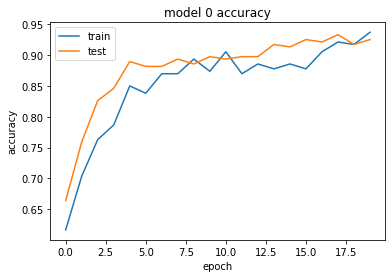

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model 0 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Loss

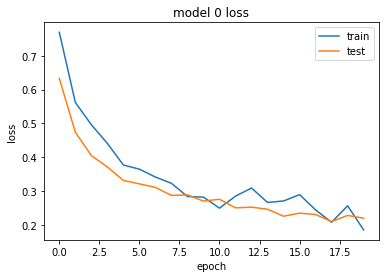

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 0 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()